# Supervised learning techniques for classification of liver disease patients

## i. The dataset

This notebook looks at the classification of liver disease using supervised learning techniques on the Indian Liver Patient Dataset (ILPD) available from UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)# <br> 
The data set was collected from the north east of Andhra Pradesh, India. <br>
The raw data is also available here: https://raw.githubusercontent.com/user389/ILPD_data/master/Indian%20Liver%20Patient%20Dataset%20ILPD.csv
<br>

Number of Instances: 583  
416 liver patient records and 167 non liver patient records.
441 male patient records and 142 female patient records.   
Any patient whose age exceeded 89 is listed as being of age "90".  
Selector is a class label used to divide into groups (liver patient or not): 1 or 2 <br>

Attribute Information (10 variables):

1. Age:	Age of the patient 
2. Gender:	Gender of the patient 
3. TB:	Total Bilirubin 
4. DB:	Direct Bilirubin 
5. Alkphos: Alkaline Phosphotase 
6. Sgpt: Alamine Aminotransferase 
7. Sgot: Aspartate Aminotransferase 
8. TP:	Total Protiens 
9. ALB:	Albumin 
10. A/G Ratio:	Albumin and Globulin Ratio 
11. Selector field used to split the data into two sets (labeled by the experts) 

## ii. Installations and imports needed for this notebook

In [2]:
!pip install imbalanced-learn
!pip install pydotplus
!pip install tpot

import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import graphviz 
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.base import clone
from itertools import combinations
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.cross_validation import StratifiedKFold

from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

from tpot import TPOTClassifier

#suppress warning 
warnings.filterwarnings("ignore", category=DeprecationWarning)

    100% |████████████████████████████████| 153kB 1.9MB/s ta 0:00:01
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 286kB 2.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    99% |███████████████████████████████▊| 880kB 9.2MB/s eta 0:00:011   25% |████████▏                       | 225kB 5.1MB/s eta 0:00:01    100% |████████████████████████████████| 890kB 558kB/s 
    100% |████████████████████████████████| 942kB 394kB/s eta 0:00:01
  Running setup.py bdist_wheel for tpot ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/00/f3/

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

## 1 Data Exploration and Cleaning

### 1.1. Loading the Dataset

In [3]:
columns = ['age', 'gender', 'Total Bili', 'Direct Bili',
           'AlkPhos', 'Sgpt/ALT', 'Sgot/AST', 'Total_Protien', 'Albumin', 'A/G ratio', 'class']

url = 'https://raw.githubusercontent.com/user389/ILPD_data/master/Indian%20Liver%20Patient%20Dataset%20ILPD.csv'
df = pd.read_csv(url, header=None, names=columns)

df.head(10)

,age,gender,Total Bili,Direct Bili,AlkPhos,Sgpt/ALT,Sgot/AST,Total_Protien,Albumin,A/G ratio,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### 1.2 Describing the data

In [4]:
# Check the number of instances and attributes match the data description from UCI.

number_of_instances = df.shape
print ( 'Number of instances: {}'.format(number_of_instances[0]) )
print ( 'Number of attributes: {}'.format(number_of_instances[1] -1 ) )  #subtract 1 which is the class label

Number of instances: 583
Number of attributes: 10


In [5]:
# Which class label corresponds to which class? 
#NB: there are 416 liver patient records and 167 non liver patient records. 

len_class_label_1 = len(df[df['class'] == 1])
len_class_label_2 = len(df[df['class'] == 2])
print ( 'Sum class label 1: {} <= this is the liver patient group'.format(len_class_label_1) )
print ( 'Sum class label 2: {} <= this is the non-liver patient group'.format(len_class_label_2) )


Sum class label 1: 416 <= this is the liver patient group
Sum class label 2: 167 <= this is the non-liver patient group


In [6]:
# Represent non-liver patient group with 0 (instead of 2) to resemble common classfication values and avoid confusion. 
df.loc[(df['class'] == 2), 'class'] = 0

# Change gender to numerical categorical values: female = 0, male = 1
class_le = LabelEncoder()
df['gender'] = class_le.fit_transform(df['gender'].values)

df.head(10)

,age,gender,Total Bili,Direct Bili,AlkPhos,Sgpt/ALT,Sgot/AST,Total_Protien,Albumin,A/G ratio,class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [7]:
# Get some general statistics about the data
df.describe()

,age,gender,Total Bili,Direct Bili,AlkPhos,Sgpt/ALT,Sgot/AST,Total_Protien,Albumin,A/G ratio,class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


- We can see the average age of a patient is 45 - with ages ranging from 4-90. <br>
- The dataset is composed of 75% male patients and 25% female patients. <br>
- Without being provided the unit of measurement for the liver function values and the normal range based on the equipment used to make the measurements, it is hard to comment further. 

### 1.3 Imputation of missing values

In [8]:
# Check for any missing values in the data
df.isnull().sum() 

age              0
gender           0
Total Bili       0
Direct Bili      0
AlkPhos          0
Sgpt/ALT         0
Sgot/AST         0
Total_Protien    0
Albumin          0
A/G ratio        4
class            0
dtype: int64

The only column with missing values is the albumin/globulin ration column which has 4 rows with missing values. <br>
As only one attribute is missing out of 10 for these rows, the missing values will be imputed using the mean for the A/G ratio:

In [9]:
df["A/G ratio"].fillna(df["A/G ratio"].mean(), inplace=True)

df.isnull().sum() 

age              0
gender           0
Total Bili       0
Direct Bili      0
AlkPhos          0
Sgpt/ALT         0
Sgot/AST         0
Total_Protien    0
Albumin          0
A/G ratio        0
class            0
dtype: int64

### 1.4 Exploring relations

#### Histograms of Features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a0da8b4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8a0d3dd6a0>]], dtype=object)

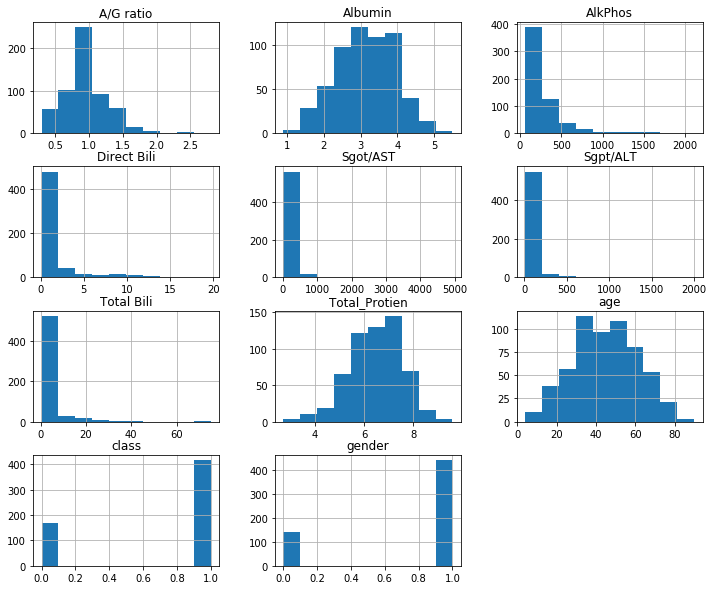

In [44]:
%matplotlib inline 

df.hist(figsize=(12,10))

#### Boxplots of Features:

age                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
gender            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Total Bili        AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Direct Bili         AxesSubplot(0.125,0.518913;0.227941x0.16413)
AlkPhos          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Sgpt/ALT         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Sgot/AST            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Total_Protien    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Albumin          AxesSubplot(0.672059,0.321957;0.227941x0.16413)
A/G ratio              AxesSubplot(0.125,0.125;0.227941x0.16413)
class               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

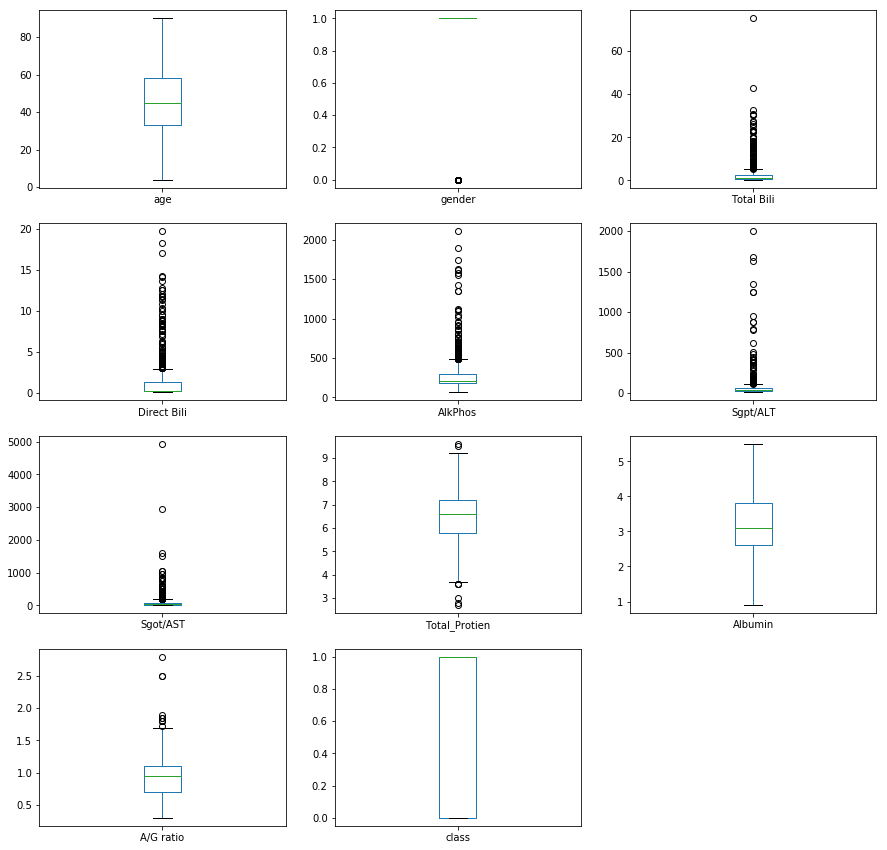

In [45]:
df.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15,15))

As can be seen from the histograms and box plots: <br>
- A/G ratio, Albumin, Total_Protein and age appear to follow a <strong>normal distribution</strong>. <br><br>
- Class and Gender are binary <strong>categorical values</strong>.<br><br>
- Total Bili, Direct Bili, Sgot/AST, Agpt/ALT and AlkPhos (which are all products or enzymes that rise as a result of liver damage) have a majority of values concentrated in a small range with several outliers covering much larger values. This is therefore a <strong>right skewed distribution</strong> with a long tail at higher values. This is a known feature of the distribution of these products as can be seen in the figure below:
<img src="images/ALT_AST_Distribution.png" alt= "ALT/AST Distribution: https://www.aafp.org/afp/1999/0415/p2223.htmltitle="ALT/AST" Distribution" width="300"  />

Liver enzymes and bilirubin can increase to very large values in certain stages of liver disease - e.g. in acute hepatic injury, values can be > 10 time the upper reference range. Therefore, the outlier values for these features were all included - as they are most likely to represent real values, rather than input or measurement error. 


#### Correlation:

In [46]:
df.corr()

,age,gender,Total Bili,Direct Bili,AlkPhos,Sgpt/ALT,Sgot/AST,Total_Protien,Albumin,A/G ratio,class
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
Total Bili,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct Bili,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
AlkPhos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Sgpt/ALT,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Sgot/AST,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protien,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
A/G ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


Text(0.5,1,'Correlation Matrix for Indian Liver Patient Dataset')

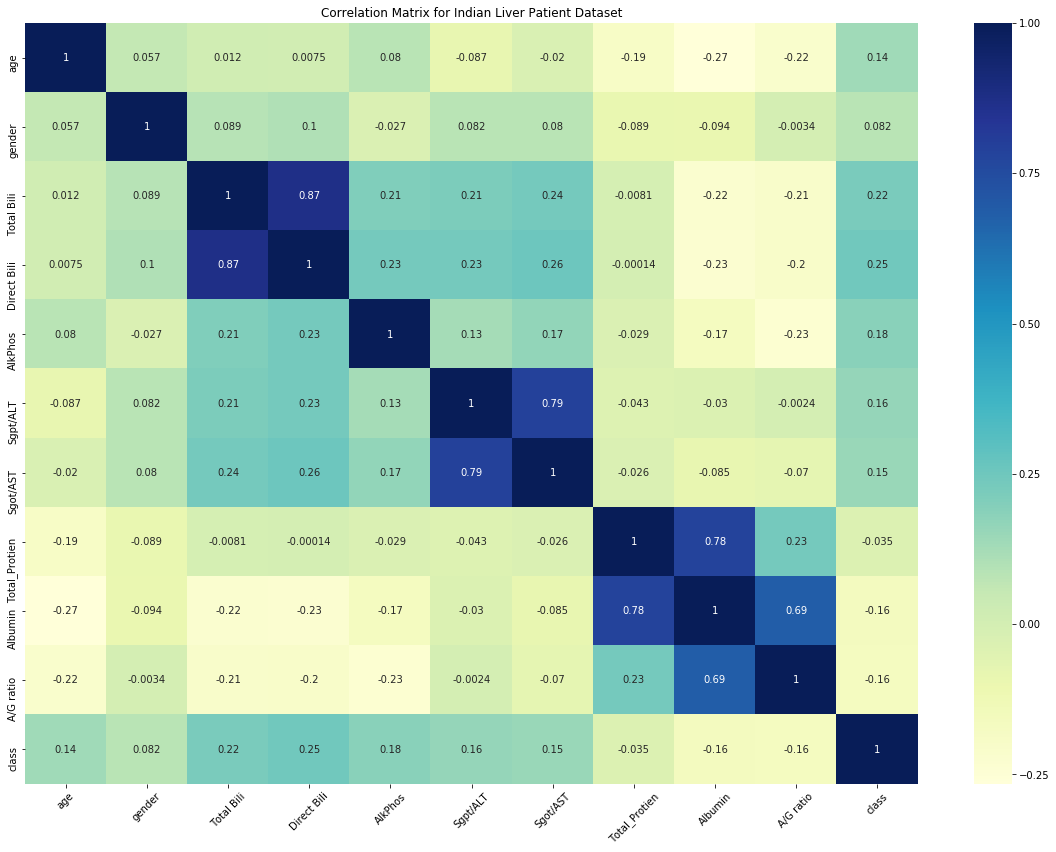

In [17]:
# we want to see the correlation between pairs of variables as a basis for feature selection
corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(20,14)
plt.title('Correlation Matrix for Indian Liver Patient Dataset')

As can be seen from the correlation matrix: <br>
- Total Bili and Direct Bili are most strongly correlated with the class value
- AlkPhos, Sgot/AST, Agpt/ALT and age correlate to a similar degree with class (0.14-0.18)
- Gender correlates poorly with class
- Albumin, A/G ration and Total_Protein correlate negatively (inversely) with class
<br>

As expected, some of the liver function tests correlate strongly with each other due to their related functions in liver physiology :
- Total Bili and Direct Bili - as total bilirubin is the total of direct (conjugated) bilirubin plus indirect (unconjugated) bilirubin in the body. 
- Sgpt/ALT and Sgot/AST correlate strongly with each other - as they are both liver enzymes, increased by cellular damage.
- Total_Protein, Albumin, A/G ratio - as these are all measures of proteins produced in the liver which decrease as liver function deteriorates. 

### 1.5 Scaling Data

Normalisation refers to the rescaling of features to a range of [0, 1] in a bounded interval. 
Standardisation centers the columns at mean = 0 and std = 1. <br>

For the ILPD data, standardisation was not chosen because, as has been seen in the visualisations above, several of the features do not follow a standard normal distribution but are significantly skewed.<br>

As will be seen in section 2 (exploring the feature space) - application of a MinMax scaler (which scales features between [0,1]) does not help in visualising the feature space - due to the dominating effect of the outliers. Therefore, sci-kit leanrn's <strong>QuantileTransformer</strong> was used to transform the features using quantiles information along a uniform distribution. For a given feature, this transformation tends to spread out the most frequent values and reduce the impact of (marginal) outliers. 


#### Quantile Scaling:

In [37]:
df_scaled = df.copy()

# don't normalise age, gender and class values
df_scaled[df_scaled.columns[2:10]] = QuantileTransformer(output_distribution='uniform').fit_transform(df_scaled[df_scaled.columns[2:10]])
df_scaled.head(10)

,age,gender,Total Bili,Direct Bili,AlkPhos,Sgpt/ALT,Sgot/AST,Total_Protien,Albumin,A/G ratio,class
0,65,0,0.154655,1.000000e-07,0.327327,0.078579,0.087588,0.595095,0.584084,0.424424,1
1,62,1,0.920420,9.228265e-01,0.950064,0.770771,0.788660,0.835335,0.543544,0.259674,1
2,62,1,0.891892,9.014014e-01,0.890891,0.744244,0.688689,0.669169,0.584084,0.388316,1
3,58,1,0.498999,5.465465e-01,0.295796,0.040541,0.126627,0.579580,0.630130,0.605606,1
4,72,1,0.823824,8.228228e-01,0.402903,0.343844,0.646647,0.786787,0.182182,0.023524,1
5,46,1,0.665666,6.356356e-01,0.498498,0.133133,0.024525,0.855355,0.956456,0.879880,1
6,26,0,0.423924,2.742743e-01,0.116116,0.078579,0.009009,0.669169,0.658158,0.605606,1
7,29,0,0.423924,4.844845e-01,0.463964,0.040541,0.002503,0.538038,0.693694,0.744745,1
8,17,1,0.423924,4.844845e-01,0.463964,0.222222,0.105105,0.811812,0.890891,0.824825,0
9,55,1,0.154655,2.742743e-01,0.731231,0.697698,0.635636,0.576577,0.618619,0.605606,1


#### Min-Max Scaling:

In [38]:
mms = MinMaxScaler()

df_mm_scaled = df.copy()
df_mm_scaled[df_mm_scaled.columns[2:10]] = mms.fit_transform(df_mm_scaled[df_mm_scaled.columns[2:10]])

#### Correlation Matrix with Quantile Scaling:

Text(0.5,1,'Correlation Matrix for Indian Liver Patient Dataset - with Qauntile Scaling')

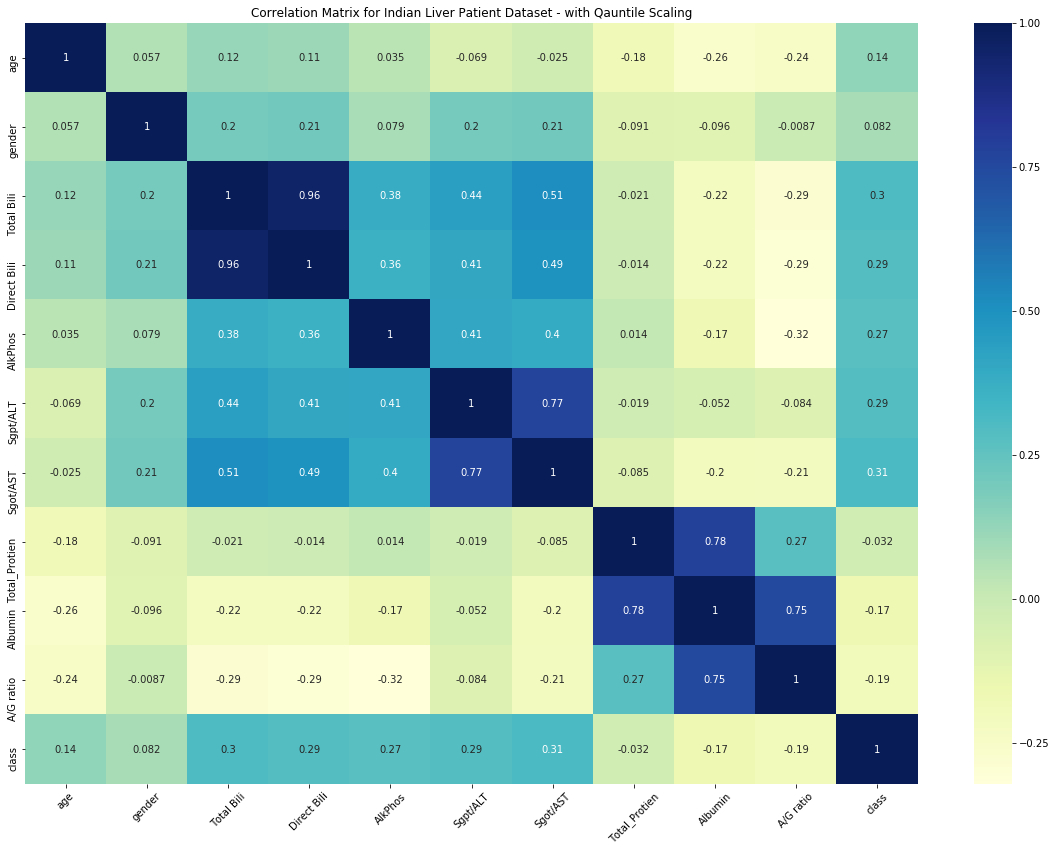

In [50]:
corr = df_scaled.corr()
#corr = df_mm_scaled.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(16,10)
plt.title('Correlation Matrix for Indian Liver Patient Dataset - with Qauntile Scaling')

Quantile Scaling raises the correlation values of Sgot/AST, Agpt/ALT and AlkPhos with the class label to a similar level to Total Bili and Direct Bili - as expected for products that are measured due to their expected rise when the liver is damaged. 

#### Histograms with Quanilte Scaling:

Text(0.5,1,'Histogram plots for features in ILPD - with Qauntile Scaling')

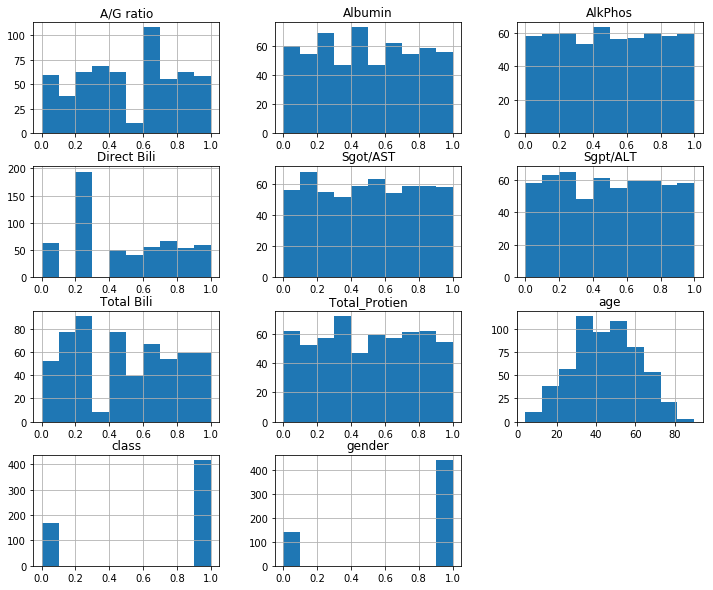

In [51]:
df_scaled.hist(figsize=(12,10))
plt.title('Histogram plots for features in ILPD - with Qauntile Scaling')

#### Boxplots with Quantile Scaling:

age                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
gender            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Total Bili        AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Direct Bili         AxesSubplot(0.125,0.518913;0.227941x0.16413)
AlkPhos          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Sgpt/ALT         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Sgot/AST            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Total_Protien    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Albumin          AxesSubplot(0.672059,0.321957;0.227941x0.16413)
A/G ratio              AxesSubplot(0.125,0.125;0.227941x0.16413)
class               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

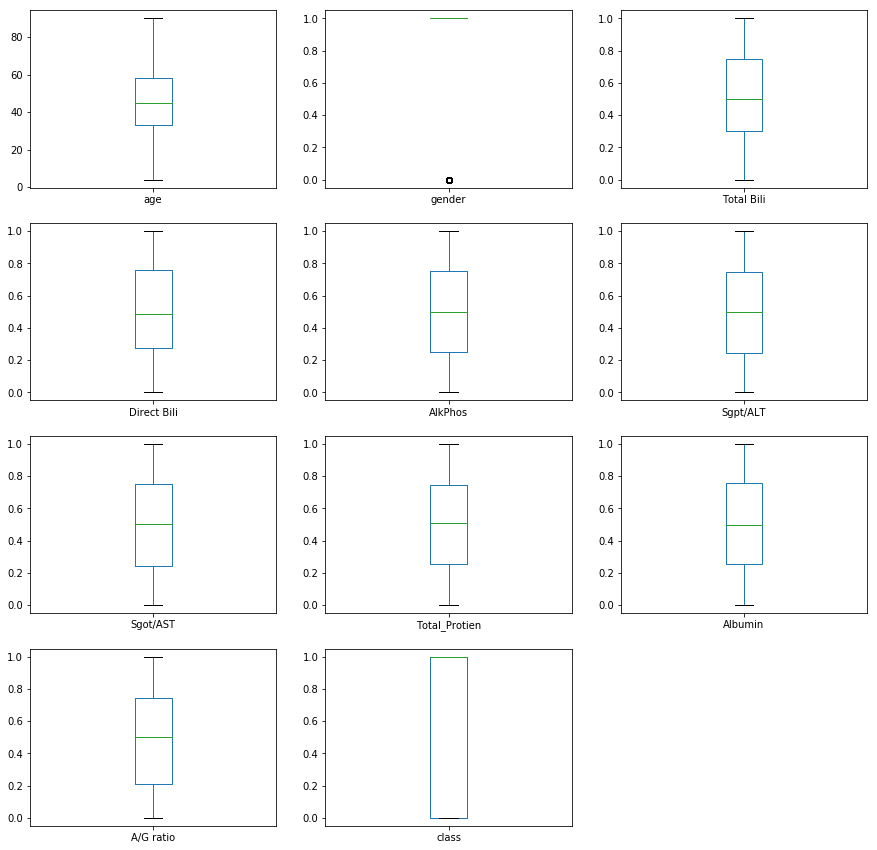

In [52]:
df_scaled.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15,15))

Quantile Scaling reduces the effect of the outliers and the uniform distribution applied can be seen.
***

## 2 The Feature Space

### 2.1 Plotting the feature space in 3D <br>
Now the feature space will be visualised in 3D - focusing on 3 key features according to the correlation matrix.

The chosen features are Sgpt/ALT, Totoal Bilirubin and Alkphos -  which have a positive correlation with the class label. 

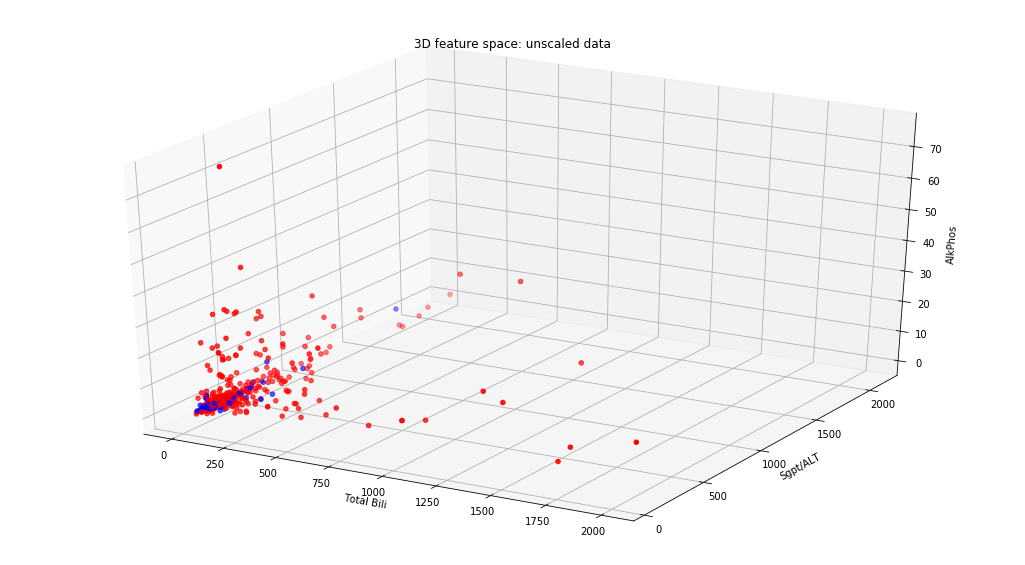

In [53]:
feature2 = df['Sgpt/ALT'].values 
feature1 = df['Total Bili'].values
feature3 = df['AlkPhos'].values

df['class']=df['class'].astype('str')

c = df['class'].values
df['class']=df['class'].astype('int')
c[c=='0'] = 'b' #negative diagnosis liver disease
c[c=='1'] = 'r' #positive diagnosis liver disease

fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter( feature2, feature3,feature1, c=c)
ax.set_ylabel('Sgpt/ALT')
ax.set_xlabel('Total Bili')
ax.set_zlabel('AlkPhos')

plt.title('3D feature space: unscaled data')
plt.show()

As expected, with the unscaled data, the effect of the large outlier values dominates the feature space and makes it hard to visualise a trend. <br>

Now let's repeat with scaled data:

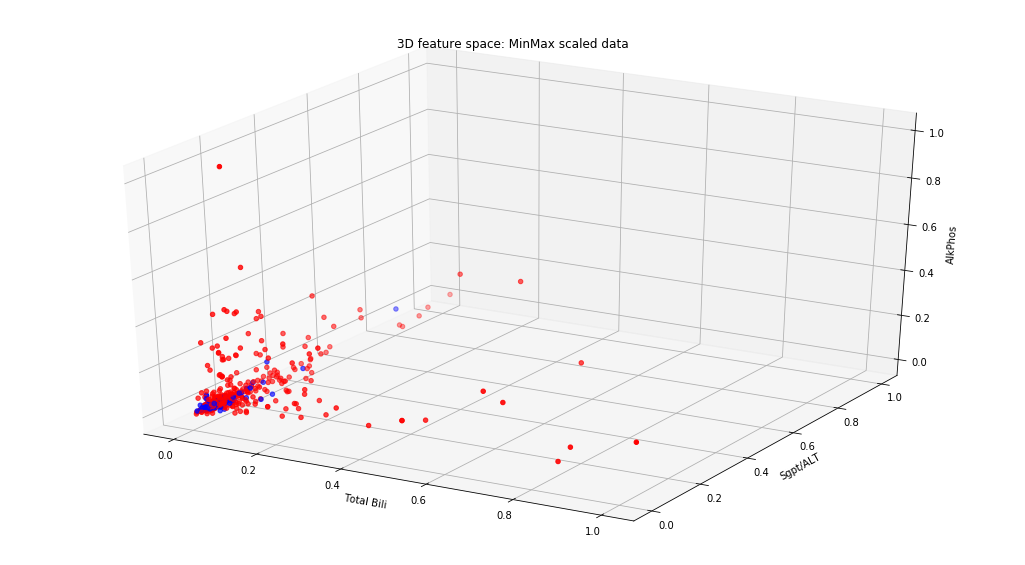

In [54]:
feature2 = df_mm_scaled['Sgpt/ALT'].values 
feature1 = df_mm_scaled['Total Bili'].values
feature3 = df_mm_scaled['AlkPhos'].values

df_mm_scaled['class']=df_mm_scaled['class'].astype('str')

c = df_mm_scaled['class'].values
df_mm_scaled['class']=df_mm_scaled['class'].astype('int')
c[c=='0'] = 'b' #negative diagnosis liver disease
c[c=='1'] = 'r' #positive diagnosis liver disease

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( feature2, feature3,feature1, c=c)
ax.set_ylabel('Sgpt/ALT')
ax.set_xlabel('Total Bili')
ax.set_zlabel('AlkPhos')

plt.title('3D feature space: MinMax scaled data')
plt.show()

MinMax scaling produces the same plot as for the unscaled data and does not aid the feature space visualisation. <br>

Let's try with Quantile scaling:

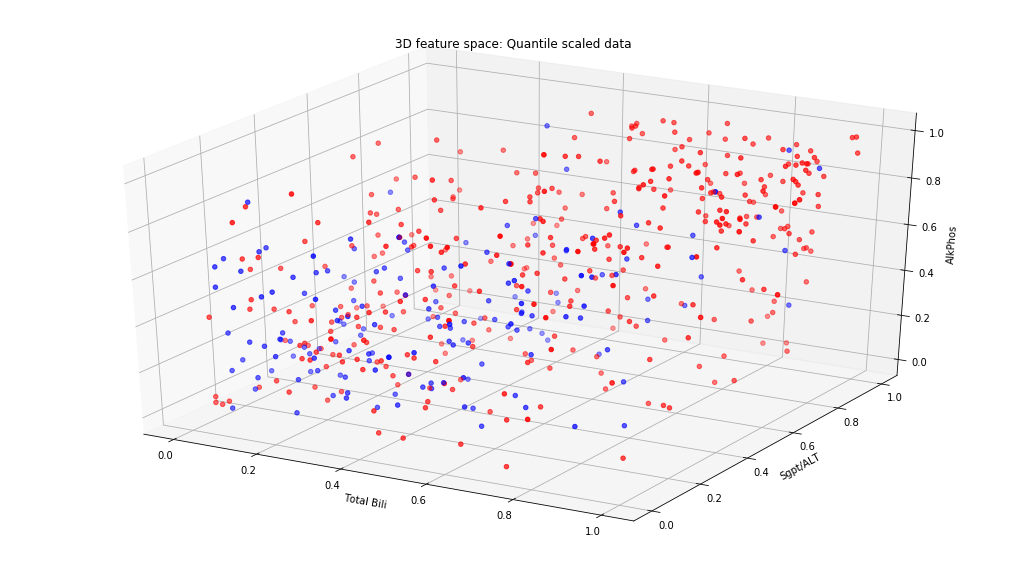

In [55]:
feature2 = df_scaled['Sgpt/ALT'].values 
feature1 = df_scaled['Total Bili'].values
feature3 = df_scaled['AlkPhos'].values

df_scaled['class']=df_scaled['class'].astype('str')

c = df_scaled['class'].values
df_scaled['class']=df_scaled['class'].astype('int')
c[c=='0'] = 'b' #negative diagnosis liver disease
c[c=='1'] = 'r' #positive diagnosis liver disease

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( feature2, feature3,feature1, c=c)
ax.set_ylabel('Sgpt/ALT')
ax.set_xlabel('Total Bili')
ax.set_zlabel('AlkPhos')

plt.title('3D feature space: Quantile scaled data')
plt.show()

Quantile transformation spreads out the most frequent values and reduces the impact of the outliers, better revealing the feature space in 3D. A trend can now be seen: there is a concentration of positive class labels at the higher levels of all 3 features. <br><br> However, at the lower levels the picture is mixed, and there is not a majority class. It is known that liver function tests can be normal in liver disease (particularly early stages)and the degree of abnormality of liver function tests does not correlate well with degree of liver disease. The features measured in liver function tests can also be elevated as a result of several other conditions, not just liver disease.  All of these factors could be contributing to the mixed picture seen here.


### 2.2 Plotting the feature space in 2D

2D plots will be shown to look at 2 of the features negatively correlated with the class label - albumin and A/G ratio. <br><br>
Albumin is a protein produced by the liver, which decreases with deterioration of liver function as the liver is not able to produce it. A/G ratio stands for albumin/globulin ratio - which is the ratio of albumin to globulins (a group of proteins produced by the liver and immune system). 
Therefore a drop in value of both features may be seen with increasing severity of liver disease. Here, they are plotted against total bilirubin (which increases with liver disease). <br>


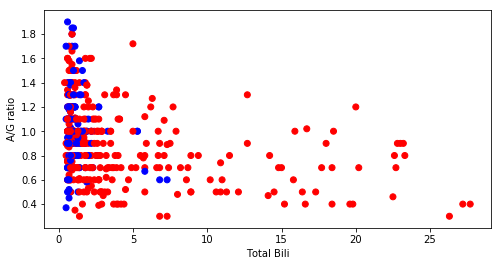

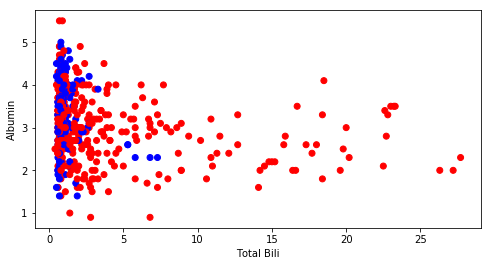

In [56]:
df_plot = df[df['Total Bili'] < 30]
df_plot = df_plot[df_plot['A/G ratio'] < 2.5]

feature2 = df_plot['A/G ratio'].values 
feature1 = df_plot['Total Bili'].values

df_plot['class']=df_plot['class'].astype('str')

c = df_plot['class'].values
df_plot['class']=df_plot['class'].astype('int')
c[c=='0'] = 'b' #negative diagnosis liver disease
c[c=='1'] = 'r' #positive diagnosis liver disease

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter( feature1, feature2, c=c)
ax.set_ylabel('A/G ratio')
ax.set_xlabel('Total Bili')


feature3 = df_plot['Albumin'].values 

fig2 = plt.figure(figsize=(8,4))
ax = fig2.add_subplot(111)
ax.scatter( feature1, feature3, c=c)
ax.set_ylabel('Albumin')
ax.set_xlabel('Total Bili')

plt.show()

The trend expected (decreasing value of albumin and A/G ratio with increasing value of bilirubin) can only be seen to a minor degree. Again, there are many confounding factors at play here - albumin reduction is usually not seen till later in liver disease as the liver compensates well in the initially stages of disease. 
The ILPD dataset also
does not state anything about the stage of liver disease of the patients, 

### 2.3 Balancing data & partitioning into training and test sets
To avoid overfitting of the classifcation alogorithms on the data, the dataset should be split into a training sample (used to train the alogirthm on) and a testing sample, which the algorithm will not see during training, therefore reducing bias. <br>

It is also important to balance the dataset - the ILPD data has 416 liver disease patients, but only 167 non-liver patients. Machine learning models often don't accurately measure model performance when faced with imbalanced datasets. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.<br>

As the number of samples in the dataset is already small, random over-sampling of the non-liver disease group was chosen as the method to balance the data. 


In [39]:
X, y = df_scaled.iloc[:, 0:10].values, df_scaled.iloc[:, -1].values

In [40]:
#show imbalance
print ("instances:", y.size)
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 583
class label 0: 167
class label 1: 416


In [41]:
OS = RandomOverSampler()
X, y = OS.fit_sample(X, y)

print ("instances:", y.size) #bigger because of oversampling
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 832
class label 0: 416
class label 1: 416


In [42]:
# Split the balanced data into testing and training sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.30, random_state=0)
    
print ('balanced, scaled, split data:', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

balanced, scaled, split data: (582, 10) (582,) (250, 10) (250,)


In [43]:
# GETTING SOME UNSCALED DATA WITH THE APPLIED FEATURE SELECTION TO PUT INTO PIPLINES

X_us_allFeatures, y_us= df.iloc[:, 0:10].values, df.iloc[:, -1].values
X_us_allFeatures, y_us = OS.fit_sample(X_us_allFeatures, y_us)

X_train_us_allFeatures, X_test_us_allFeatures, y_train_us, y_test_us = \
        train_test_split(X_us_allFeatures, y_us, test_size=0.3, random_state=0)
    
print ('balanced, unscaled, split data:', X_train_us_allFeatures.shape, y_train_us.shape, X_test_us_allFeatures.shape, y_test_us.shape)

balanced, unscaled, split data: (582, 10) (582,) (250, 10) (250,)


***
## 3 Feature Selection
There are two main ways to reduce the complexity of a model and minimise noise:

- <strong>Feature selection</strong>: using a subset of the original features. Often, in datasets, there are redundant features that don't add to accuracy of the model and contribute to noise in the model. Here, a combination of 'filter' and 'wrapper' techniques will be used for feature selection. Filter methods use learning algorithm independent features to filter out and wrapper methods use the error rate to filter out features. <br><br>
- <strong>Feature extraction </strong> (dimensionality reduction): derives information from the feature set to construct a new feature subspace. Principal component analysis will be explored in the next section.<br>

#### A basline accuarcy for a very simple un-tuned naive bayes classifier to use as for comparison during feature selection:

In [62]:
clf_bayes = GaussianNB()
clf_bayes.fit(X_train, y_train)

print('Test accuracy:', clf_bayes.score(X_test, y_test))

Test accuracy: 0.728


#### Sequential Backwards Selection to look at accuracy against feature subsets:

In [63]:
# SBS function from HolgerKunz library

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.30
                 
                 , random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


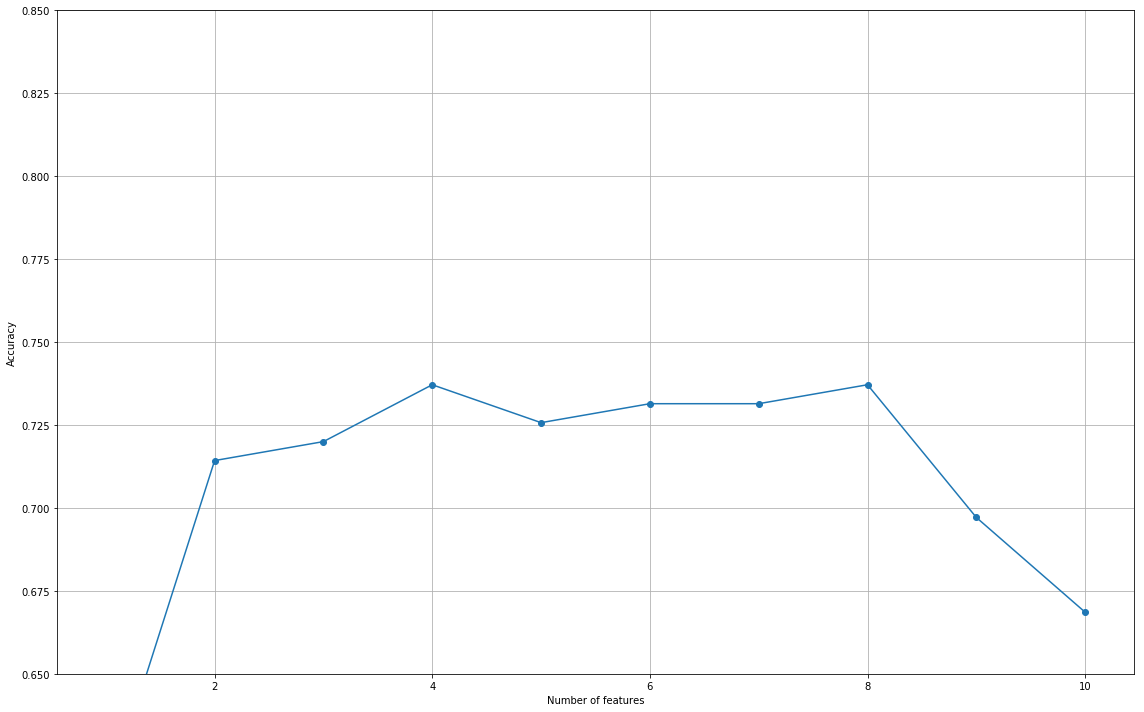

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)

sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.65, 0.85])
plt.rcParams['figure.figsize']=(16,10)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [65]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 2, 4, 5, 6, 7, 8, 9),
 (0, 2, 4, 5, 6, 7, 9),
 (0, 2, 4, 5, 6, 9),
 (0, 2, 4, 5, 6),
 (0, 2, 4, 5),
 (0, 4, 5),
 (0, 5),
 (0,)]

In [66]:
# Which 5 features are in the subset with the best accuracy?:
k5=list(sbs.subsets_[5])
k5

[0, 2, 4, 5, 6]

In [67]:
feature_labels = df_scaled.columns[0:10]
feature_labels[k5]

Index(['age', 'Total Bili', 'AlkPhos', 'Sgpt/ALT', 'Sgot/AST'], dtype='object')

In [68]:
# Last 2 features always produce a drop off in accuracy - look at 8 features before that drop off:
k8= list(sbs.subsets_[2])
k8

[0, 2, 4, 5, 6, 7, 8, 9]

In [69]:
feature_labels = df_scaled.columns[0:10]
feature_labels[k8]

Index(['age', 'Total Bili', 'AlkPhos', 'Sgpt/ALT', 'Sgot/AST', 'Total_Protien',
       'Albumin', 'A/G ratio'],
      dtype='object')

When running the above SBS with different random splits of training data - the results vary each time. There is generally a trend that the first 4-6 features increase accuracy then the rest leads to a drop in accuracy. The last 2 features always decrease the accuracy, but these features vary each time. The 4 features consistently in the subset that gives best accuracy are:
- Total Bili
- Sgpt/ALT
- Sgot/ALT
- Albumin <br>

Ramama et al., when analysing the same dataset, used a Weka ranking tool to order the attributes. The bottom 6 attribtues (with lowest priority) are:
 
- Gender
- Age 
- Total_protiens 
- Globulin 
- A/G ratio 
- ALP <br>

Combining the results of the SBS and the Weka ranking by Ramana et al., the features chosen for exclusion from the dataset and the reasoning are:

- <strong>Gender</strong>: The dataset is imbalanced in respect to gender - 75% of the instances are male. There is little information about the type of liver diseases in the ILPD and whilst there is ongoing research into the gender specific differences in the epidemiology and progression of liver disease, without more information about this dataset, it is difficult to know the importance of this for classification here. However, with 75% of the dataset having the same categorical value for this feature, it is unlikely to have mucj significance in our models. It also has a low correlation with the class variable (0.082).

- <strong>Direct Bili</strong>: As consistently this is in the subset of features features that do not contribute ot increased accuracy in SBS. This feature, also, does not add a significant amount of information not already contained in total bili.
- <strong>Total Protein</strong>: As consistently this is in the subset of features features that do not contribute ot increased accuracy in SBS - and low score in the Weka ranking. Total protein can be affected as a result of many other pathologies. 
- <strong>A/G Ratio</strong>: As consistently this is in the subset of features features that do not contribute ot increased accuracy in SBS - and low score in the Weka ranking.


In [44]:
#boolean mask to apply to the dataset to exclude the above 4 features:
mask1 = np.array([True, False, True, False, True, True, True, False, True, False])

X_train_fs, X_test_fs = X_train[:, mask1], X_test[:, mask1]
print ('scaled, feature selected dataset:', X_train_fs.shape, y_train.shape, X_test_fs.shape, y_test.shape )

X_train_us, X_test_us = X_train_us_allFeatures[:, mask1], X_test_us_allFeatures[:, mask1]
print ('unscaled, feature selected dataset:',X_train_us.shape, y_train_us.shape, X_test_us.shape, y_test_us.shape )


scaled, feature selected dataset: (582, 6) (582,) (250, 6) (250,)
unscaled, feature selected dataset: (582, 6) (582,) (250, 6) (250,)


***
## 4 Dimensionality Reuction

### 4.1 Principal Component Analysis

In [16]:
pca1 = PCA()

# Looking at the explained variance ratio for all 10 features (before feature selection):
X_train_pca = pca1.fit_transform(X_train)
sorted(pca1.explained_variance_ratio_)

[9.2410395747552246e-06,
 1.2612619497944668e-05,
 6.7296769357738881e-05,
 0.00014069021767965228,
 0.00024136958987226452,
 0.00029097917789643578,
 0.00056040388791116626,
 0.00063804412654694094,
 0.0010883589097401849,
 0.99695100366192291]

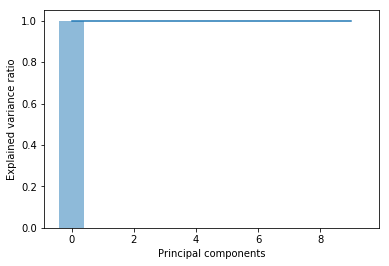

In [17]:
explained_variance_ratio_ = pca1.explained_variance_ratio_[0:11]

plt.bar(np.arange(10), explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(10), np.cumsum(explained_variance_ratio_), where='mid')
plt.rcParams['figure.figsize']=(12,8)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

The picture seen above is causeed by the effect of age- this feature has by far the highest explained variance ratio and dominates the feature space variance so the other variances are not visible on this plot.  

In [18]:
pca2 = PCA()
# Looking at the explained variance ratio for the 6 remaining features:
X_train_fs_pca = pca2.fit_transform(X_train_fs)
sorted(pca2.explained_variance_ratio_)

[6.695831336526648e-05,
 0.00017098245935460822,
 0.00021110422522359828,
 0.00027564490672731153,
 0.00075690178367057899,
 0.99851840831165872]

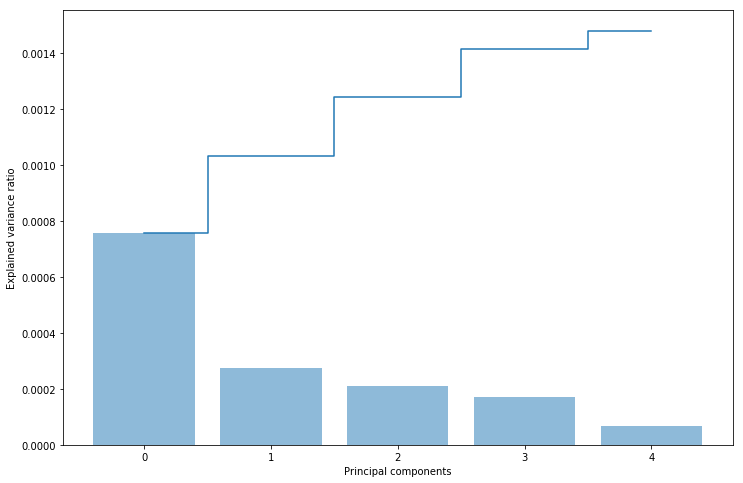

In [19]:
#exclude age from this plot to better visualise the remaining feature's variances:
explained_variance_ratio_ = pca2.explained_variance_ratio_[1:7]

plt.bar(np.arange(5), explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(5), np.cumsum(explained_variance_ratio_), where='mid')
plt.rcParams['figure.figsize']=(12,8)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

As can be seen above, 70% of the remaining variance (excluding age) can be accounted for by just 2 features. 

### 4.2 Estimating accuracy with different numbers of components

In [20]:
# SOME VERY BASIC PIPELINES WITHOUT PARAMETER TUNING OF THE NAIVE BAYES MODEL 
# TO LOOK AT PCA WITH DIFFERENT COMPONENT NUMEBRS AND SCALERS

num_component = 2

pipe_bayes_us = Pipeline([
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_scl = Pipeline([('std', StandardScaler()),
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_qtl = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_us.fit(X_train_us, y_train_us)
print('Test Accuracy (unscaled): %.3f' % pipe_bayes_us.score(X_test_us, y_test_us))
y_pred_scl = pipe_bayes_us.predict(X_test_us)

pipe_bayes_scl.fit(X_train_us, y_train_us)
print('Test Accuracy (standard scaler): %.3f' % pipe_bayes_scl.score(X_test_us, y_test_us))
y_pred_scl = pipe_bayes_scl.predict(X_test_us)

pipe_bayes_qtl.fit(X_train_us, y_train_us)
print('Test Accuracy (Quantile Scaler): %.3f' % pipe_bayes_qtl.score(X_test_us, y_test_us))
y_pred_qtl = pipe_bayes_qtl.predict(X_test_us)



Test Accuracy (unscaled): 0.652
Test Accuracy (standard scaler): 0.676
Test Accuracy (Quantile Scaler): 0.700


In [21]:
# accuracy with all features included and 10 principal components
num_component = 10

pipe_bayes_us = Pipeline([
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_scl = Pipeline([('std', StandardScaler()),
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_qtl = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=num_component)),
            ('clf', GaussianNB())])

pipe_bayes_us.fit(X_train_us_allFeatures, y_train_us)
print('Test Accuracy (unscaled): %.3f' % pipe_bayes_us.score(X_test_us_allFeatures, y_test_us))
y_pred_scl = pipe_bayes_us.predict(X_test_us_allFeatures)

pipe_bayes_scl.fit(X_train_us_allFeatures, y_train_us)
print('Test Accuracy (standard scaler): %.3f' % pipe_bayes_scl.score(X_test_us_allFeatures, y_test_us))
y_pred_scl = pipe_bayes_scl.predict(X_test_us_allFeatures)

pipe_bayes_qtl.fit(X_train_us_allFeatures, y_train_us)
print('Test Accuracy (Quantile Scaler): %.3f' % pipe_bayes_qtl.score(X_test_us_allFeatures, y_test_us))
y_pred_qtl = pipe_bayes_qtl.predict(X_test_us_allFeatures)

Test Accuracy (unscaled): 0.636
Test Accuracy (standard scaler): 0.616
Test Accuracy (Quantile Scaler): 0.652


The above 2 cells demonstrate that reducing the dimensionality of the feature space (from 10 to 2) improves the accuracy of this simple naive bayes model. It also shows the improved accuracy with the application of standard and quantile scalers. 

#### Plotting principal components against accuracy:

In [18]:
def plotvector(X_train_us, y_train_us, X_test_us, y_test_us):
    results = []
    
    for i in range(1, 6):
        pipe_bayes = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=i)),
            ('clf', GaussianNB())])
        
        pipe_bayes.fit(X_train_us, y_train_us)
        accuracy = pipe_bayes.score(X_test_us, y_test_us)
        results.append([i,accuracy])
 
    results = np.array(results)
    return(results)

PCA_accuracy =  plotvector(X_train_us, y_train_us, X_test_us, y_test_us)
PCA_accuracy

array([[ 1.   ,  0.704],
       [ 2.   ,  0.724],
       [ 3.   ,  0.716],
       [ 4.   ,  0.72 ],
       [ 5.   ,  0.716]])

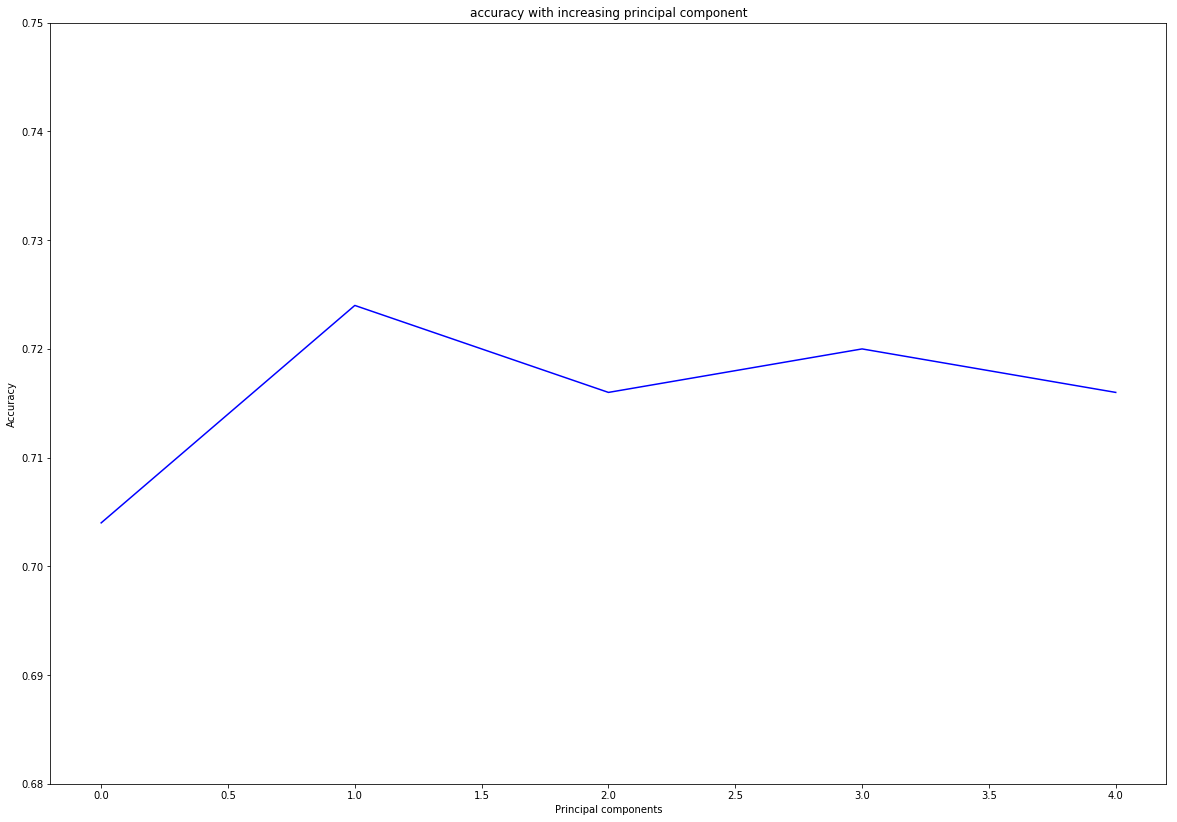

In [22]:
line = plt.plot(PCA_accuracy, color='b')
plt.ylim(0.68, 0.75)
plt.title("accuracy with increasing principal component")
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.show()

Here we can see the best accuracy is at 2 principal components. The effect of dimensionality reduction will be further explored when looking at learning curves. 
***


## 5 Evaluating Algorithms: Chosing the right Classifier

In [79]:
pipelines = []
num_components = 2
num_folds = 10
num_instances = len(X_train_us)
seed = 7 
scoring = 'accuracy'

In [80]:
# Spot-Check Algorithms
pipelines_us = []

pipelines_us.append(( 'KNN' , KNeighborsClassifier()))
pipelines_us.append(( 'SVM' , SVC(probability=True, verbose=False)))
pipelines_us.append(( 'NB' , GaussianNB()))
pipelines_us.append(( 'DT' , DecisionTreeClassifier()))
pipelines_us.append(('Dummy', DummyClassifier(strategy="most_frequent")))
pipelines_us.append(('MLP', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False)))

In [81]:
results_us = []
names_us = []

for name, model in pipelines_us:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train_us, y_train_us, cv=kfold,
      scoring=scoring)
  results_us.append(cv_results)
  names_us.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


KNN: 0.706254 (0.046033)
SVM: 0.886587 (0.045063)
NB: 0.676973 (0.044439)
DT: 0.785213 (0.063681)
Dummy: 0.450263 (0.035688)
MLP: 0.656283 (0.050222)


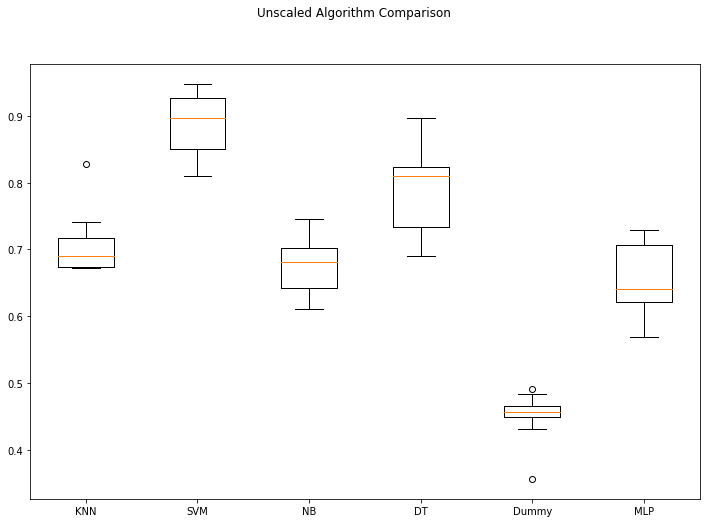

In [82]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Unscaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.rcParams['figure.figsize']=(12,8)
plt.boxplot(results_us)
ax.set_xticklabels(names_us)
plt.show()

In [83]:
pipelines_qs = []

pipe_knn = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', KNeighborsClassifier())])

pipe_svc = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', SVC(probability=True, verbose=False))])

pipe_NB = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', GaussianNB())])

pipe_DT = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', DecisionTreeClassifier())])

pipe_Dummy = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('clf', DummyClassifier(strategy="most_frequent"))])

pipe_MLP = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=750, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False))])



pipelines_qs.append(( 'ScaledKNN' , pipe_knn))
pipelines_qs.append(( 'ScaledSVM' , pipe_svc))
pipelines_qs.append(( 'ScaledNB' , pipe_NB))
pipelines_qs.append(( 'ScaledDT' , pipe_DT))
pipelines_qs.append(( 'ScaledDummy', pipe_Dummy))
pipelines_qs.append(( 'ScaledMLP', pipe_MLP))


In [84]:
results_qs = []
names_qs = []
for name, model in pipelines_qs:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train_us, y_train_us, cv=kfold,
      scoring=scoring)
  results_qs.append(cv_results)
  names_qs.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)



ScaledKNN: 0.678667 (0.063666)
ScaledSVM: 0.702835 (0.044963)
ScaledNB: 0.690766 (0.043141)
ScaledDT: 0.793922 (0.050007)
ScaledDummy: 0.450263 (0.035688)
ScaledMLP: 0.570865 (0.122393)


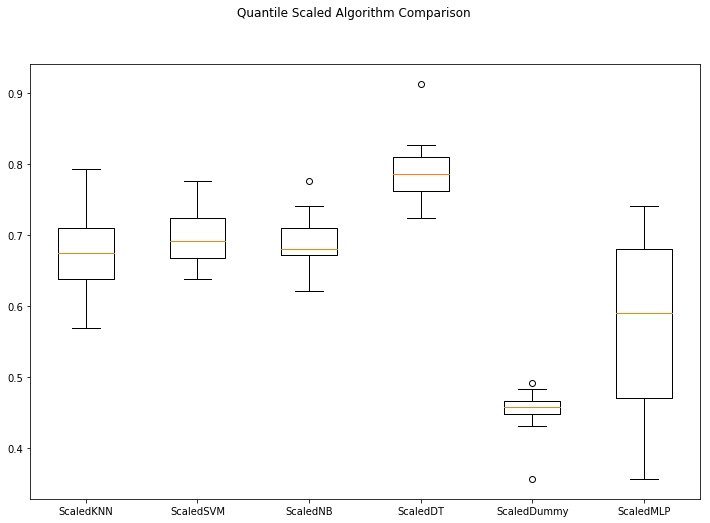

In [85]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Quantile Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results_qs)
ax.set_xticklabels(names_qs)
plt.show()

In [86]:
pipelines_ss = []

pipe_knn_ss = Pipeline([('qtl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', KNeighborsClassifier())])

pipe_svc_ss = Pipeline([('qtl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', SVC(probability=True, verbose=False))])

pipe_DT_ss = Pipeline([('qtl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', DecisionTreeClassifier())])

pipe_NB_ss = Pipeline([('qtl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', GaussianNB())])

pipe_Dummy_ss = Pipeline([('qtl', StandardScaler()),
                     ('clf', DummyClassifier(strategy="most_frequent"))])

pipe_MLP_ss = Pipeline([('qtl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=750, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False))])

pipelines_ss.append(( 'ScaledKNN' , pipe_knn_ss))
pipelines_ss.append(( 'ScaledSVM' , pipe_svc_ss))
pipelines_ss.append(( 'ScaledNB' , pipe_NB_ss))
pipelines_ss.append(( 'ScaledDT' , pipe_DT_ss))
pipelines_ss.append(( 'ScaledDummy', pipe_Dummy_ss))
pipelines_ss.append(( 'ScaledMLP', pipe_MLP_ss))


In [87]:
results_ss = []
names_ss = []
for name, model in pipelines_ss:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train_us, y_train_us, cv=kfold,
      scoring=scoring)
  results_ss.append(cv_results)
  names_ss.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledKNN: 0.695763 (0.045549)
ScaledSVM: 0.709673 (0.045521)
ScaledNB: 0.683957 (0.044043)
ScaledDT: 0.804208 (0.044449)
ScaledDummy: 0.450263 (0.035688)
ScaledMLP: 0.677002 (0.041820)


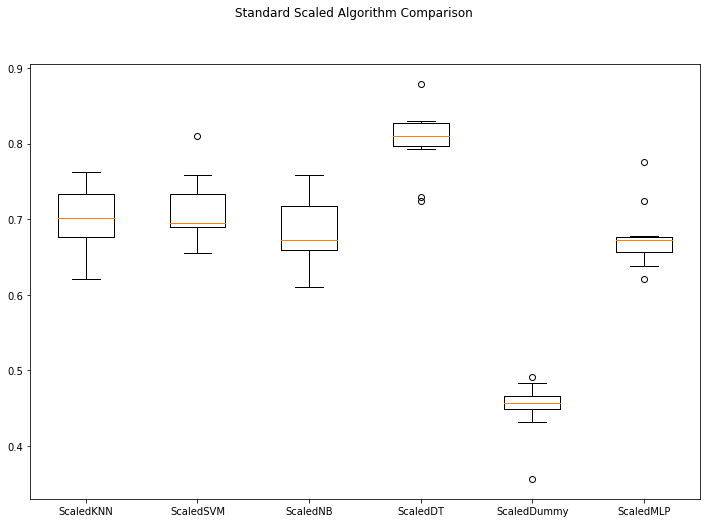

In [88]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Standard Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results_ss)
ax.set_xticklabels(names_ss)
plt.show()


Across all 3 (unscaled, quantile and standard scaled) DT and SVM either as good as KNN/Naive bayes or better. MLP is generally only as good as the naive algorithms - and in quantile scaled data it is only as good as the dummy variable. <br>

Best results overall here are for unscaled data. Consider this is without parameter tuning though - so we need to perform hyperparameter tuning and model assessment (tuning for bias and variance). <br>

Will be focussing on SVM and DT. <br>

## 6 Algorithm Tuning

### 6.1 SVM hyper-parameter tuning

NB. Training only is only done on train data - not on test data for parameter tuning. So that bias is not introduced in the model by exposure to the test data.

In [40]:
# GRID SEARCH FOR SVM

num_folds = 10
num_instances = len(X_train_us)
seed = 7 
kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train_us, y_train_us)

scores = cross_val_score(estimator=pipe_svc, X=X_train_us, y=y_train_us, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train_us, y_train_us)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)


'''
WITH 1 PRINCIPAL COMPONENT:
--> Model Training Accuracy (Standard Scaler): 0.696 +/- 0.057
--> Tuned Parameters Best Score:  0.7199312714776632
--> Best Parameters: 
 {'clf__C': 1000.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}
'''

--> Model Training Accuracy (Standard Scaler): 0.692 +/- 0.071
--> Tuned Parameters Best Score:  0.8676975945017182
--> Best Parameters: 
 {'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


"\nWITH 1 PRINCIPAL COMPONENT:\n--> Model Training Accuracy (Standard Scaler): 0.696 +/- 0.057\n--> Tuned Parameters Best Score:  0.7199312714776632\n--> Best Parameters: \n {'clf__C': 1000.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}\n"

### 6.2 Decision Tree Hyper-Parameter Tuning

In [43]:
#  GRID SEARCH FOR DECISION TREE

pipe_DT = Pipeline([ ('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ( 'clf', DecisionTreeClassifier(random_state=0)) ])

pipe_DT.fit(X_train_us, y_train_us)

scores = cross_val_score(estimator=pipe_DT, X=X_train_us, y=y_train_us, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))
max_depth = np.arange(3, 10)
param_grid = [{'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['gini']},
              {'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['entropy']}
               ]

# instantiate the grid
gs_DT = GridSearchCV(pipe_DT, 
                    param_grid, 
                    cv=kfold, 
                    scoring='accuracy',
                    n_jobs=1)

# fit the grid with data
gs_DT.fit(X_train_us, y_train_us)
print('--> Tuned Parameters Best Score: ',gs_DT.best_score_)
print('--> Best Parameters: \n',gs_DT.best_params_)



--> Model Training Accuracy (Standard Scaler): 0.775 +/- 0.043
--> Tuned Parameters Best Score:  0.7560137457044673
--> Best Parameters: 
 {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_split': 4}


### 6.3 Assessing Model Performace with K-fold Cross_Validation

In [91]:
pipe_svc_CV = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1.0, gamma=1000.0))])


kfold = StratifiedKFold(y=y_train_us, 
                        n_folds=20,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svc.fit(X_train_us[train], y_train_us[train])
    score = pipe_svc.score(X_train_us[test], y_train_us[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train_us[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [274 278], Acc: 0.733
Fold: 2, Class dist.: [274 278], Acc: 0.833
Fold: 3, Class dist.: [274 278], Acc: 0.633
Fold: 4, Class dist.: [274 278], Acc: 0.700
Fold: 5, Class dist.: [274 278], Acc: 0.700
Fold: 6, Class dist.: [274 278], Acc: 0.733
Fold: 7, Class dist.: [274 278], Acc: 0.700
Fold: 8, Class dist.: [274 278], Acc: 0.833
Fold: 9, Class dist.: [274 278], Acc: 0.767
Fold: 10, Class dist.: [275 278], Acc: 0.655
Fold: 11, Class dist.: [275 278], Acc: 0.655
Fold: 12, Class dist.: [275 278], Acc: 0.690
Fold: 13, Class dist.: [275 278], Acc: 0.724
Fold: 14, Class dist.: [275 279], Acc: 0.786
Fold: 15, Class dist.: [275 279], Acc: 0.679
Fold: 16, Class dist.: [275 279], Acc: 0.714
Fold: 17, Class dist.: [275 279], Acc: 0.607
Fold: 18, Class dist.: [275 279], Acc: 0.786
Fold: 19, Class dist.: [275 279], Acc: 0.607
Fold: 20, Class dist.: [275 279], Acc: 0.643

CV accuracy: 0.709 +/- 0.065


In [92]:
scores = cross_val_score(estimator=pipe_svc_CV, 
                         X=X_train_us, 
                         y=y_train_us, 
                         cv=20,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy scores: [ 0.83333333  0.93333333  0.9         0.93333333  0.83333333  0.83333333
  0.83333333  0.83333333  0.96666667  0.86206897  0.89655172  0.89655172
  0.93103448  0.92857143  0.82142857  0.96428571  0.85714286  0.92857143
  0.82142857  0.82142857]
CV accuracy: 0.881 +/- 0.050


### 6.4 Debugging algorithms with learning curves
Diagnosing bias and variance problems with learning curves

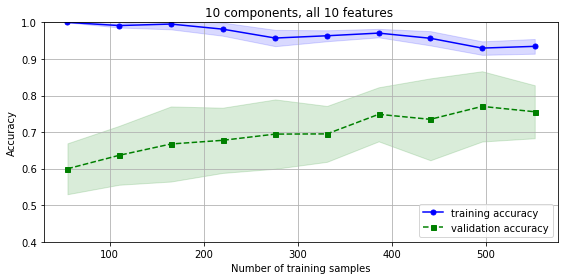

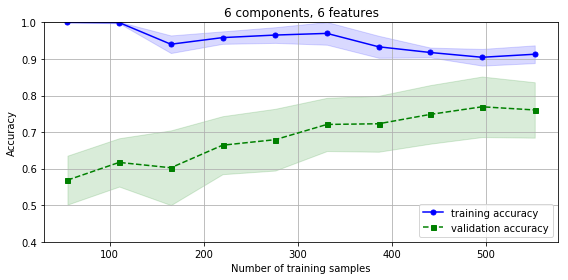

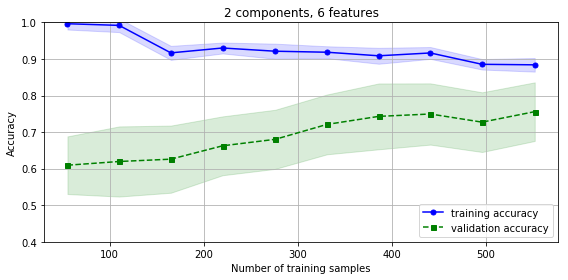

In [96]:
# FIRST LOOKING AT LEARNING CURVES FOR OPTIMISED DECISION TREE CLASSIFIER

pipe_DT_LC1 = Pipeline([('scl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=2)),
            ('clf', DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth =9, min_samples_split = 4) )      
                       ])

pipe_DT_LC2 = Pipeline([('scl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=6)),
            ('clf', DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth =9, min_samples_split = 4) )      
                       ])

pipe_DT_LC3 = Pipeline([('scl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=10)),
           ('clf', DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth =9, min_samples_split = 4) )      
                       ])


def print_learning_curve(pipe, X_data, y_data, title):

    train_sizes, train_scores, test_scores =\
                    learning_curve(
                        estimator=pipe, 
                        X=X_data, 
                        y=y_data, 
                        train_sizes=np.linspace(0.1, 1.0, 10), 
                        cv=20,
                        n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std, 
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.0])
    plt.rcParams['figure.figsize']=(8,4)
    plt.title(title)
    plt.tight_layout()
    plt.show()

print_learning_curve(pipe_DT_LC3, X_train_us_allFeatures, y_train_us, '10 components, all 10 features ')
print_learning_curve(pipe_DT_LC2, X_train_us, y_train_us, '6 components, 6 features')
print_learning_curve(pipe_DT_LC1, X_train_us, y_train_us, '2 components, 6 features')

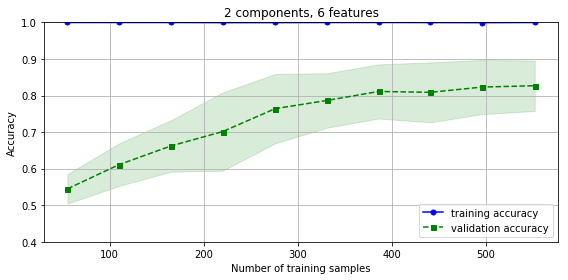

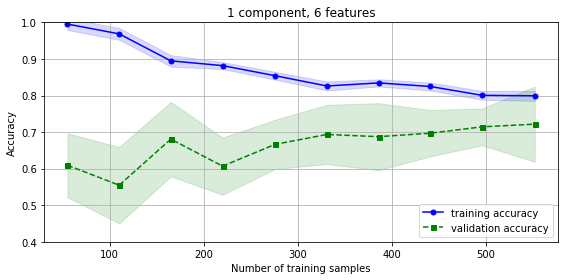

In [94]:
# LOOKING AT LEARNING CURVES FOR OPTIMISED SVM CLASSIFIER

pipe_svc_LC1 = Pipeline([('scl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=2)),
           ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1.0, gamma=1000.0))
                       ])

pipe_svc_LC2 = Pipeline([('scl', QuantileTransformer(output_distribution='uniform')),
            ('pca', PCA(n_components=1)),
           ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1.0, gamma=1000.0))
                       ])


def print_learning_curve(pipe, X_data, y_data, title):

    train_sizes, train_scores, test_scores =\
                    learning_curve(
                        estimator=pipe, 
                        X=X_data, 
                        y=y_data, 
                        train_sizes=np.linspace(0.1, 1.0, 10), 
                        cv=20,
                        n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std, 
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.0])
    plt.rcParams['figure.figsize']=(8,4)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    
print_learning_curve(pipe_svc_LC1, X_train_us, y_train_us, '2 components, 6 features')
print_learning_curve(pipe_svc_LC2, X_train_us, y_train_us, '1 component, 6 features')

These learning curves are discussed in more detail in the attached paper section 3.2 - basically they indicate high varaince in the data, which is reduced with recicing prinicipal components (reducing model complexity) with a slight trade off in increased bias. 

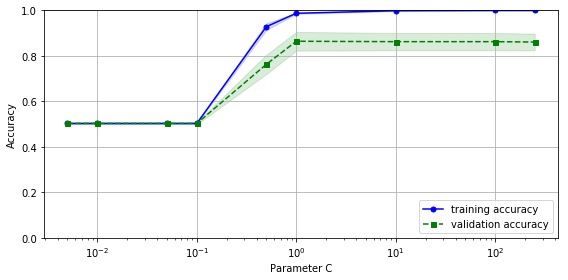

In [95]:
pipe_svc_VC = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', SVC(probability=True, verbose=False, kernel='rbf', gamma=1000.0))])

param_range = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0, 250.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc_VC, 
                X=X_train_us, 
                y=y_train_us, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
plt.show()

***
## 7 Finalize Models

### 7.1 Fitting the best parameters and testing accurary

In [41]:
# FIT THE BEST ESTIMATORS FOR SVC - WITH PRINCIPAL COMPONENTS = 2 TO REDUCE VARIANCE. 

# Use best parameters
clf_svc = gs_svc.best_estimator_

# Get Final Scores
clf_svc.fit(X_train_us, y_train_us)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train_us,
                         y=y_train_us,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final SVC Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final SVC Accuracy on Test set: %.5f' % clf_svc.score(X_test_us,y_test_us))

--> Final SVC Model Training Accuracy: 0.861 +/- 0.039
--> Final SVC Accuracy on Test set: 0.88000


In [45]:
# Use best parameters
clf_DT = gs_DT.best_estimator_

# Get Final Scores
clf_DT.fit(X_train_us, y_train_us)
scores = cross_val_score(estimator=clf_DT,
                         X=X_train_us,
                         y=y_train_us,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final DT Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final DT Accuracy on Test set: %.5f' % clf_DT.score(X_test_us,y_test_us))

--> Final DT Model Training Accuracy: 0.763 +/- 0.048
--> Final DT Accuracy on Test set: 0.75200


### 7.2 Visualise Decision Trees

In [101]:
!pip install pydotplus

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


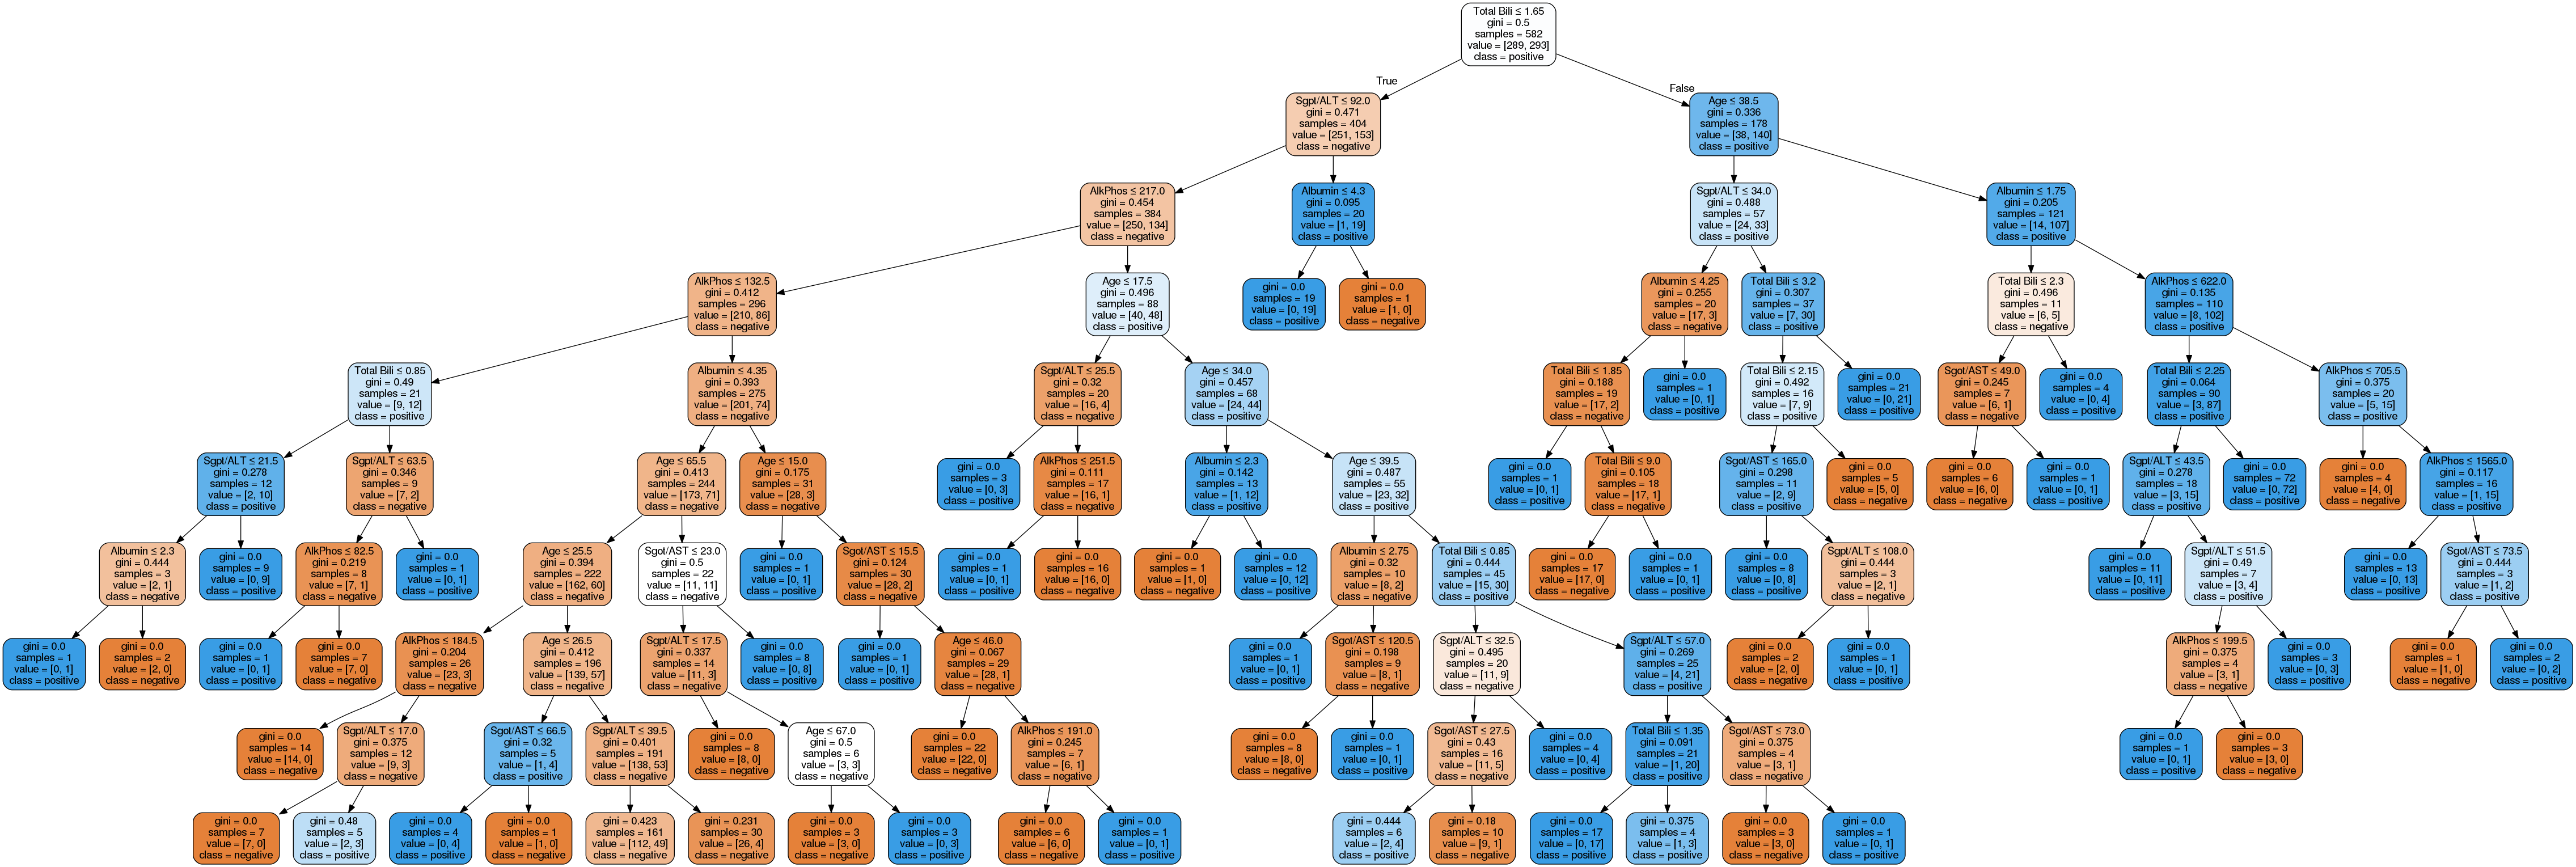

In [111]:
#FULL DECISION TREE WITH MAX DEPTH = 9

clf_DT = DecisionTreeClassifier(criterion = 'gini', max_depth=9, min_samples_split=2, random_state=42)
clf_DT.fit(X_train_us, y_train_us)

names = ['Age', 'Total Bili', 'AlkPhos', 'Sgpt/ALT', 'Sgot/AST', 'Albumin']

dot_data=StringIO()

dot_data = export_graphviz(clf_DT, out_file = None, feature_names=names, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())

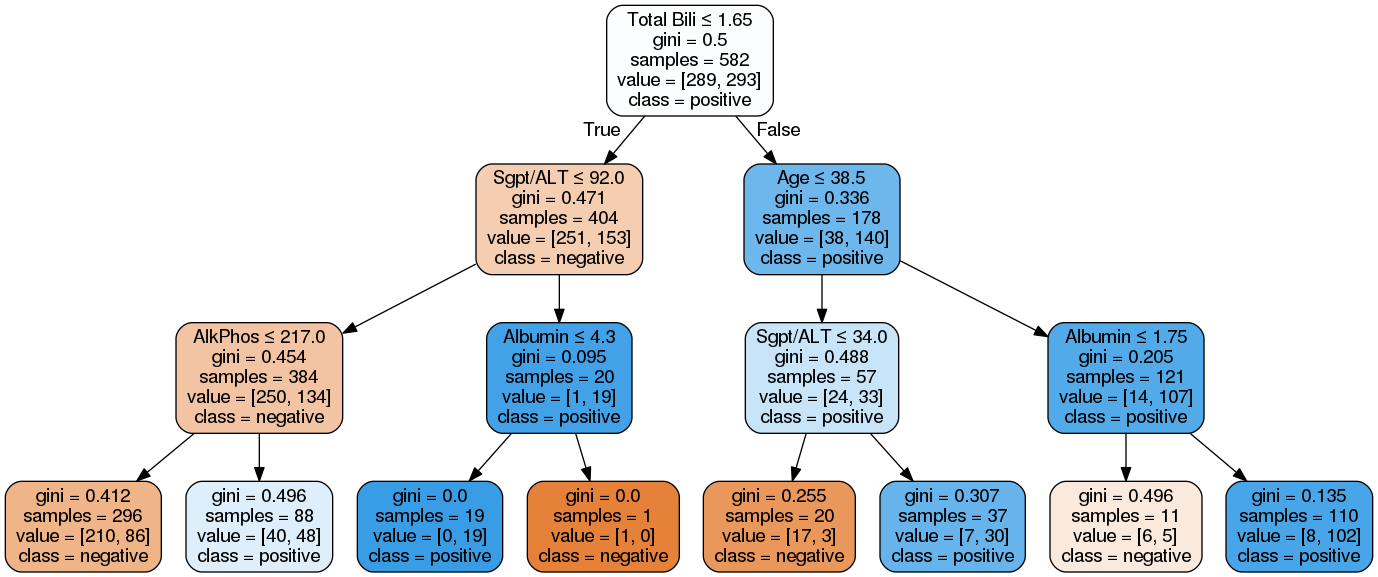

In [114]:
#FULL DECISION TREE WITH MAX DEPTH = 3

clf_DT2 = DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_split=2, random_state=42)
clf_DT2.fit(X_train_us, y_train_us)

names = ['Age', 'Total Bili', 'AlkPhos', 'Sgpt/ALT', 'Sgot/AST', 'Albumin']

dot_data=StringIO()

dot_data = export_graphviz(clf_DT2, out_file = None, feature_names=names, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())

***
## 8 Evaluation Metrics

Accuracy = (TP +TN) / (TP + FP + FN +TN)

Specificity (true negative rate) = TN / TN + FP

Sensitivity (true positive rate / recall) = TP / (TP + FN)   

Positive Predictive Value (Precision) = TP / (TP+FP)    

Negative Predictive Value (NPV) = TN / TN + FN

F1 = 2 * (precision * recall) / (precision + recall)


EVALUATING FINAL SVC MODEL
Accuracy: 0.88
Confusion Matrix:


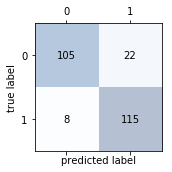

             precision    recall  f1-score   support

          0       0.93      0.83      0.88       127
          1       0.84      0.93      0.88       123

avg / total       0.89      0.88      0.88       250



In [72]:
# LOOK AT SOME EVALUATION STATISTICS FOR FINAL SVC MODEL 

y_pred_SVC = clf_svc.predict(X_test_us)

print('EVALUATING FINAL SVC MODEL')
print('Accuracy:', accuracy_score(y_test_us, y_pred_SVC))
print('Confusion Matrix:')
confmat = confusion_matrix(y_test_us, y_pred_SVC)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

print(classification_report(y_test_us, y_pred_SVC))


In [68]:
print ('Specificity:', 115/(115+8))
print ('NPV:', 115/(115+22))

Specificity: 0.9349593495934959
NPV: 0.8394160583941606


EVALUATING FINAL DECISION TREE MODEL
Accuracy: 0.752
Confusion Matrix:


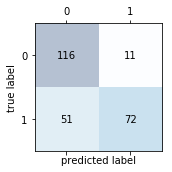

             precision    recall  f1-score   support

          0       0.69      0.91      0.79       127
          1       0.87      0.59      0.70       123

avg / total       0.78      0.75      0.74       250



In [71]:
# LOOK AT SOME EVALUATION STATISTICS FOR FINAL DT MODEL 

y_pred_DT2 = clf_DT.predict(X_test_us)

print('EVALUATING FINAL DECISION TREE MODEL')
print('Accuracy:', accuracy_score(y_test_us, y_pred_DT2))
confmat = confusion_matrix(y_test_us, y_pred_DT2)
print('Confusion Matrix:')


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

print(classification_report(y_test_us, y_pred_DT2))

In [73]:
print ('Specificity:', 72/(7251))
print ('NPV:', 72/(72+11))

Specificity: 0.00992966487381051
NPV: 0.8674698795180723


### Grid Search to optimise difference evaluation parameters

In [122]:
# GRID SEARCH USING ROC-AUC AS SCORING CRITIERIA RATHER THAN ACCURACY FOR SVM

scorer = make_scorer(roc_auc_score)

c_gamma_range = [0.01, 0.1, 1.0, 1.2, 10.0, 100.0]

param_grid = [{'clf__C': c_gamma_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': c_gamma_range, 
                  'clf__gamma': c_gamma_range, 
                  'clf__kernel': ['rbf'],}]

gs_SVC2 = GridSearchCV(estimator=pipe_svc, 
                                param_grid=param_grid, 
                                scoring=scorer, 
                                cv=10)
gs = gs_SVC2.fit(X_train_us, y_train_us)
print(gs_SVC2.best_score_)
print(gs_SVC2.best_params_)

0.8097825289613416
{'clf__C': 10.0, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'}


In [54]:
# GRID SEARCH USING ROC-AUC AS SCORING CRITIERIA RATHER THAN ACCURACY FOR DT

scorer = make_scorer(roc_auc_score)

param_grid = [{'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['gini']},
              {'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['entropy']}
               ]

# instantiate the grid
gs_DT2 = GridSearchCV(pipe_DT, 
                    param_grid, 
                    cv=kfold, 
                    scoring=scorer,
                    n_jobs=1)

gs_DT2 = gs_DT2.fit(X_train_us, y_train_us)
print(gs_DT2.best_score_)
print(gs_DT2.best_params_)

0.7619992946911499
{'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_split': 4}


As can be seen, the hyper-parameeters agree with the optimal ones using accuracy - except that a slightly harder (higher) C value for SVM has been chosen.

### ROC Curves

In [95]:
pipelines_roc = []
num_components = 2

pipe_knn = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', KNeighborsClassifier())])

pipe_svc = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', SVC(probability=True, verbose=False, C=10.0, gamma=100.0, kernel='rbf'))])

pipe_NB = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', GaussianNB())])

pipe_DT = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', DecisionTreeClassifier(criterion = 'gini', max_depth=9, min_samples_split=4))])

pipe_Dummy = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('clf', DummyClassifier(strategy="most_frequent"))])

pipe_MLP = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=750, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False))])

pipe_GBC = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=6, random_state=0)) ])



pipelines_roc.append(( 'ScaledKNN' , pipe_knn))
pipelines_roc.append(( 'Optimised_ SVM' , pipe_svc))
pipelines_roc.append(( 'ScaledNB' , pipe_NB))
pipelines_roc.append(( 'Optimised_DT' , pipe_DT))
pipelines_roc.append(( 'ScaledDummy', pipe_Dummy))
pipelines_roc.append(( 'ScaledMLP', pipe_MLP))
pipelines_roc.append(( 'GBC', pipe_GBC))


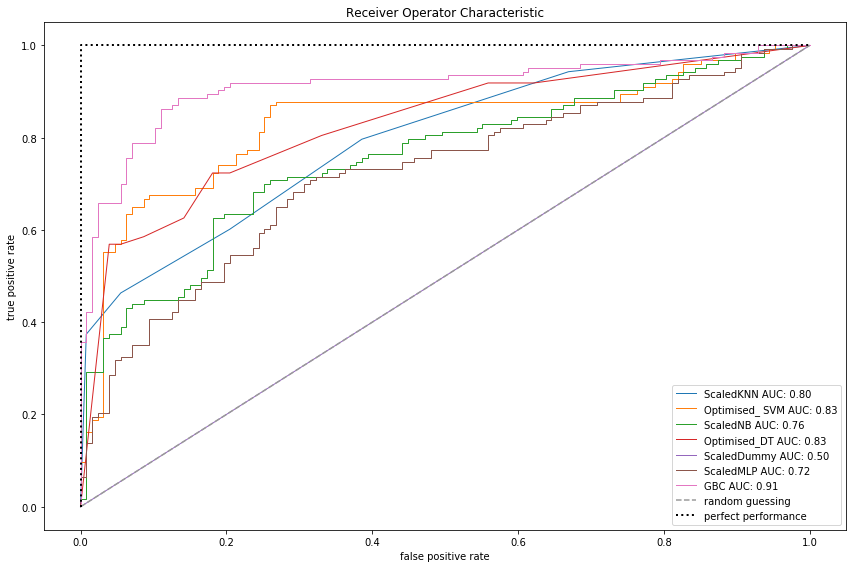

In [96]:
# PLOTTING AUC FOR OPTIMISED AND UN-OPTIMISED ALGORITHMS FOR COMPARISON, 
# AS WELL AS DUMMY CLASSIFIER AND PERFECT CLASSIFIER

fig = plt.figure(figsize=(12, 8))
all_tpr = []

for name, model in pipelines_roc:
      
    model.fit(X_train_us, y_train_us)
    
    probas = model.predict_proba(X_test_us)
    fpr, tpr, thresholds = roc_curve(y_test_us, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [32]:
# CALCULATING AUC FOR DIFFERENT HYPER-PARAMETERS FOR SVC

pipelines_kernels = []

pipe_svcA = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False, C=10.0, gamma=100.0, kernel='rbf'))])

pipe_svcB = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False, C=10.0, gamma=100.0, kernel='linear'))])

pipe_svcC = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False, C=10.0, gamma=100.0, kernel='sigmoid'))])

pipe_svcD = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False, C=10.0, gamma=100.0, kernel='poly'))])

pipelines_kernels.append(( 'SVC_rbf' , pipe_svcA))
pipelines_kernels.append(( 'SVC_linear' , pipe_svcB))
pipelines_kernels.append(( 'SVC_sigmoid' , pipe_svcC))
pipelines_kernels.append(( 'SVC_polynomial' , pipe_svcD))

for name, pipe in pipelines_kernels:
    
    pipe.fit(X_train_us, y_train_us)
    
    probas = pipe.predict_proba(X_test_us)
    fpr, tpr, thresholds = roc_curve(y_test_us, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    #current_auc = 'AUC', name, '%.2f' %roc_auc
    print ('AUC', name, '%.2f' %roc_auc)


AUC SVC_rbf 0.83
AUC SVC_linear 0.76
AUC SVC_sigmoid 0.64
AUC SVC_polynomial 0.77


In [33]:
# CALCULATING AUC FOR DIFFERENT HYPER-PARAMETERS FOR DT

pipelines_DTs = []

pipe_DTA = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(criterion = 'gini', max_depth=9, min_samples_split=2))])

pipe_DTB = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(criterion = 'entropy', max_depth=9, min_samples_split=2))])

pipe_DTC = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(criterion = 'gini', max_depth=6, min_samples_split=2))])

pipe_DTD = Pipeline([('qtl', QuantileTransformer(output_distribution='uniform')),
                     ('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(criterion = 'entropy', max_depth=6, min_samples_split=2))])

pipelines_DTs.append(( 'DT_gini_depth=9' , pipe_DTA))
pipelines_DTs.append(( 'DT_entropy_depth=9' , pipe_DTB))
pipelines_DTs.append(( 'DT_gini_depth=6' , pipe_DTC))
pipelines_DTs.append(( 'DT_entropy_depth=6' , pipe_DTD))

for name, pipe in pipelines_DTs:
    pipe_DT = pipe.fit(X_train_us, y_train_us)
    
    probas = pipe.predict_proba(X_test_us)
    fpr, tpr, thresholds = roc_curve(y_test_us, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ('AUC', name, '%.2f' %roc_auc)


AUC DT_gini_depth=9 0.85
AUC DT_entropy_depth=9 0.85
AUC DT_gini_depth=6 0.78
AUC DT_entropy_depth=6 0.77


***
## 9 TPOT & Ensembles

In [233]:
!pip install tpot

    100% |████████████████████████████████| 890kB 750kB/s eta 0:00:01  2% |▊                               | 20kB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 942kB 754kB/s eta 0:00:01    48% |███████████████▍                | 450kB 16.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for tpot ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/d2/54/33/7549c05095a6a38d3de610f88f2d075e56617ff887dce6d54e
  Running setup.py bdist_wheel for deap ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/82/aa/67/2c93e17c84646c86099fda53ee0b3329372dcf94dd8789fd13
  Running setup.py bdist_wheel for stopit ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/95/fc/6b/0289a3bce1635be994845f61cbaa91a7ac93dfc453229f0442
Successfully built tpot deap stopit
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [234]:
from tpot import TPOTClassifier
!pip install tpot

In [235]:
pipeline_optimizer = TPOTClassifier(generations=3, population_size=10, cv=5,
                                    random_state=42, verbosity=2)

In [236]:
pipeline_optimizer.fit(X_train_us, y_train_us)

Optimization Progress:  50%|█████     | 20/40 [00:23<00:35,  1.78s/pipeline]

Generation 1 - Current best internal CV score: 0.800687220492318


Optimization Progress:  75%|███████▌  | 30/40 [00:38<00:13,  1.37s/pipeline]

Generation 2 - Current best internal CV score: 0.8055918194748779


Generation 3 - Current best internal CV score: 0.8108094670613412

Best pipeline: GradientBoostingClassifier(PCA(StandardScaler(input_matrix), iterated_power=2, svd_solver=randomized), learning_rate=0.5, max_depth=6, max_features=0.1, min_samples_leaf=1, min_samples_split=11, n_estimators=100, subsample=0.6)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=3, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=10, periodic_checkpoint_folder=None,
        population_size=10, random_state=42, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

EVALUATING FINAL GRADIENT TREE BOOSTING MODEL
Accuracy: 0.864
Confusion Matrix:


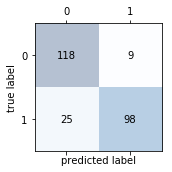

             precision    recall  f1-score   support

          0       0.83      0.93      0.87       127
          1       0.92      0.80      0.85       123

avg / total       0.87      0.86      0.86       250

ROC_AUC score 0.862940912874


In [45]:
# LOOKING AT PERFORMANCE OF GRADIENT TREE BOOSTING CLASSIFER - CLASSIFIER SUGGESTED BY TPOT

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,
    max_depth=6, random_state=0).fit(X_train_fs, y_train)
clf.score(X_test_fs, y_test)  

y_pred_GBC = clf.predict(X_test_fs)

print('EVALUATING FINAL GRADIENT TREE BOOSTING MODEL')
print('Accuracy:', accuracy_score(y_test, y_pred_GBC))
confmat = confusion_matrix(y_test, y_pred_GBC)
print('Confusion Matrix:')


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_GBC))
print('ROC_AUC score', roc_auc_score(y_test, y_pred_GBC))


In [97]:
print ('Specificity:', 95/(95+28))
print ('NPV:', 95/(95+11))

Specificity: 0.7723577235772358
NPV: 0.8962264150943396


In [94]:
probas = clf.predict_proba(X_test_fs)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print ('AUC Gradient Boosting Classifier:', '%.2f' %roc_auc)

AUC Gradient Boosting Classifier: 0.95
